# Project 1

## (a) Nobel Laureates 

In [ ]:
import pandas as pd
import numpy as np
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns

#### (1) Read the data in your notebook and display the first 8 rows. How many columns and rows are there in this dataset? What are the column names?

In [ ]:
df = pd.read_csv("nobel.csv")

In [ ]:
# Printing first 8 rows
df.head(8)

In [ ]:
# Getting number of columns and rows
df.shape

In [ ]:
# Getting column names
for col in df.columns:
    print(col)

There are 989 rows and 18 columns

#### (2) All of the first 8 winners were from Europe. But that was back in 1901. Looking at all winners in this data, which gender and which country is the most commonly represented? (For country, we will use the birth_country of the winner.) 

In [32]:
# Calculating most represented country
country_count = df['birth_country'].value_counts()
country_count.head(1)

KeyError: 'birth_country'

In [ ]:
# Calculating most represented gender
gender_count = df['gender'].value_counts()
gender_count.head(1)

#### (3) For the dominant country that you found in question 2, calculate the proportions of winners from that country in each decade. Make some plots to visualize your results. In which decade did the proportion reach the highest? 

In [ ]:
# Create decade column in df
df['year'] = pd.to_datetime(df['year'], format='%Y')
df['decade'] = (df['year'].dt.year // 10) * 10

In [ ]:
# Filter USA winners
USA_winners = df[(df['birth_country'] == 'USA')]
USA_winners.head()

In [ ]:
# Calculate proportion for each decade
USA_counts = USA_winners.groupby(['decade'])['laureate_type'].count().reset_index(name='count')
USA_counts['proportion'] = USA_counts['count']/296
USA_counts.head(15)

In [ ]:
plt.style.use('ggplot')
USA_counts['proportion'].plot(kind="bar", xlabel = 'decade')

In [ ]:
The proportion ins the 10th decade was the highest (i.e. 2000s)

#### (4) Is there any gender imbalance in this data? How significant is that? Calculate the proportion of female laureates in each decade. Visualize your results and discuss.

In [ ]:
indiv_winners = df[(df['laureate_type'] == 'Individual')]
indiv_winners.head()

In [ ]:
# Calculate proportion for each gender
gender_counts = indiv_winners.groupby(['decade','gender'])['laureate_type'].count().reset_index(name='count')

gender_counts['proportion'] = gender_counts['count']/gender_counts['count'].sum()
gender_counts.head()

In [ ]:
# Group the data by decade and gender
grouped_df = gender_counts.groupby(['decade', 'gender'])['proportion'].sum().unstack()

# Plot the data using a stacked bar chart
ax = grouped_df.plot(kind='bar', stacked=True, figsize=(10, 5))

# Set the plot title and axis labels
ax.set_title('Proportion of Gender per Decade')
ax.set_xlabel('Decade')
ax.set_ylabel('Proportion')

# Set the legend position
ax.legend(loc='upper left')

# Show the plot
plt.style.use('fivethirtyeight')
plt.show()

Hence, it is clear that there is an under-representation of females across the decades

#### (5) For the gender imbalance that you found in question 4, is it better or worse within specific prize categories? Visualize your results for each category and discuss. Which of them has the largest gender imbalance? Which has shown some positive trend over the decades?

In [ ]:
prize_counts = indiv_winners.groupby(['decade','gender', 'prize'])['laureate_type'].count().reset_index(name='count')

prize_counts['proportion'] = prize_counts['count']/prize_counts['count'].sum()

# Set the plot size and style
plt.figure(figsize=(12, 6))
plt.style.use('ggplot')

# Define the prize categories
prizes = prize_counts['prize'].unique()

# Loop through each prize category and plot a grouped bar chart
for i, prize in enumerate(prizes):
    plt.subplot(2, 3, i+1)
    prize_df = prize_counts[prize_counts['prize'] == prize]
    sns.barplot(x='decade', y='proportion', hue='gender', data=prize_df)
    plt.title(prize)
    plt.xlabel('Decade')
    plt.ylabel('Proportion')
    plt.legend(loc='upper left')
    
# Set the plot title
plt.suptitle('Proportion of Gender per Decade for Each Prize Category')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

The largest imbalances are in the Nobel Prize in Physics and The Sveriges Riksbank Prize in Economic Sciences in Memory of Alfred Nobel while the Nobel Peace prize and Nobel prize in Literature shows positive trends

#### (6) Are there any people who have won the Nobel Prize more than once? Who are they? 


In [ ]:
# Group the data by full_name and count the number of occurrences
counts = indiv_winners.groupby('full_name').size().reset_index(name='num_wins')

# Filter the DataFrame to only include names that appear more than once
multiple_winners = counts[counts['num_wins'] > 1]

# Print multiple winners
multiple_winners.head()

#### (7)  Who are the oldest and youngest people ever to have won a Nobel Prize? How old were the winners generally when they got the prize? Show the summary statistics, and plot the distribution of the age of winners. 

In [ ]:
df = df[(df['laureate_type'] == 'Individual')]

In [ ]:
# Convert birth_date and award_year columns to datetime format
df['birth_date'] = pd.to_datetime(df['birth_date'])
df['year'] = pd.to_datetime(df['year'], format='%Y')

# Calculate age at the time of winning for each winner
df['age_at_win'] = (df['year'] - df['birth_date']).astype('<m8[Y]')

df.head()

In [ ]:
# Find the oldest and youngest people ever to have won a Nobel Prize
oldest_winner = df.loc[df['age_at_win'].idxmax(), 'full_name']
youngest_winner = df.loc[df['age_at_win'].idxmin(), 'full_name']

print('Oldest winner:', oldest_winner)
print('Youngest winner:', youngest_winner)

In [ ]:
# Calculate summary statistics for age at the time of winning
age_summary = df['age_at_win'].describe()
age_summary

In [ ]:
# Plot the distribution of age at the time of winning
plt.style.use('fivethirtyeight')
plt.hist(df['age_at_win'], bins=20)
plt.title('Distribution of Age at Time of Winning')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

#### (8) For your results in question 7, does the average age of winners differ across each category? For each category, show the summary statistics and plot the distribution of the age of winners. Which categories have the largest and smallest average age of winners? 

In [ ]:
# use pandas to group the data by prize category and calculate the summary statistics for the age column
age_stats_by_category = df.groupby('prize')['age_at_win'].describe()
print(age_stats_by_category)

In [ ]:
# use seaborn to plot the distribution of the age of winners for each prize category
ax = sns.histplot(data=df, x='age_at_win', hue='prize', kde=True, bins=np.arange(0, 110, 10))
plt.xlabel('Age at time of award')
plt.ylabel('Number of winners')
plt.legend(labels = df['prize'], title = "Prize Categories", fontsize = 'x-small')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))


plt.show()

In [ ]:
# identify the categories with the largest and smallest average age of winners
avg_age_by_category = df.groupby('prize')['age_at_win'].mean()
print(avg_age_by_category)

In [ ]:
# category with largest average age of winners
largest_avg_age_category = avg_age_by_category.idxmax()
print(f"{largest_avg_age_category} has the largest average age with an average age of {avg_age_by_category.max():.2f} years.")


In [ ]:
# category with smallest average age of winners
smallest_avg_age_category = avg_age_by_category.idxmin()
print(f"{smallest_avg_age_category} has the smallest average age with an average age of {avg_age_by_category.min():.2f} years.")


#### (9) Make some plots to visualize the time trend of the average age of winners in each specific category per decade. What do you find?

In [ ]:
# Group by decade and prize category
age_by_category = df.groupby(['decade', 'category'])['age_at_win'].mean().reset_index()


In [ ]:
ax1 = sns.lineplot(x='decade', y='age_at_win', hue='category', data=age_by_category, ci='sd')
plt.xlabel('Decade')
plt.ylabel('Average age')
plt.legend(title = "Prize Categories", fontsize = 'x-small')
sns.move_legend(ax1, "upper left", bbox_to_anchor=(1, 1))

plt.title('Trend of the average age of Nobel Prize winners by category per decade')
plt.show()

The average of of nobel prize winners are generally increasing with the exception of Peace and Economic Sciences

#### (10) Repeat the analysis in question 9, but with lifespan instead of age. What do you find? 

In [ ]:
# Convert dates to datetime format
df['birth_date'] = pd.to_datetime(df['birth_date'])
df['death_date'] = pd.to_datetime(df['death_date'])

# Calculate lifespan of each prize winner
df['lifespan'] = df['death_date'] - df['birth_date']

# Treat NA values for winners who are still alive
df['lifespan'] = df['lifespan'].fillna(dt.datetime.now() - df['birth_date'])

# Calculate lifespan in years
df['lifespan'] = df['lifespan'].dt.days / 365.25

df.head()

In [ ]:
lifespan_by_category = df.groupby(['decade', 'category'])['lifespan'].mean().reset_index()

ax2 = sns.lineplot(x='decade', y='lifespan', hue='category', data=lifespan_by_category, ci='sd')
plt.xlabel('Decade')
plt.ylabel('Lifespan')
plt.legend(title = "Prize Categories", fontsize = 'x-small')
sns.move_legend(ax2, "upper left", bbox_to_anchor=(1, 1))

plt.title('Trend of the average age of Nobel Prize winners by category per decade')
plt.show()

The average lifespan of Nobel Prize winners are decreasing

## (b) Covid-19 


## 11. Read the data (covid.csv) in your notebook and display the first 8 rows. How many columns and rows are there in this dataset? What are the column names?


In [16]:
import pandas as pd
df = pd.read_csv('covid.csv', sep = ',')
df



,Reported_Date,HA,Sex,Age_Group,Classification_Reported
0,2020-01-26,Out of Canada,M,40-49,Lab-diagnosed
1,2020-02-02,Vancouver Coastal,F,50-59,Lab-diagnosed
2,2020-02-05,Out of Canada,F,20-29,Lab-diagnosed
3,2020-02-05,Out of Canada,M,30-39,Lab-diagnosed
4,2020-02-11,Interior,F,30-39,Lab-diagnosed
...,...,...,...,...,...
12549,2020-10-22,Vancouver Coastal,M,60-69,Lab-diagnosed
12550,2020-10-22,Vancouver Coastal,M,10-19,Lab-diagnosed
12551,2020-10-22,Vancouver Coastal,M,60-69,Lab-diagnosed
12552,2020-10-23,Vancouver Coastal,U,Unknown,Lab-diagnosed


In [18]:

num_rows, num_cols = df.shape
print(f"There are {num_rows} rows and {num_cols} columns in this dataset.")

print(f"The column names are: Reported_Date, HA, Sex, Age_Group, Classification_Reported")



There are 12554 rows and 5 columns in this dataset.
The column names are: Reported_Date, HA, Sex, Age_Group, Classification_Reported


## 12. Create a new column Month to represent the month of the Reported_Date in the data. Print the first 8 rows of updated dataframe.

In [20]:
df['Month'] = pd.to_datetime(df['Reported_Date']).dt.month_name()


print(df.head(8))

  Reported_Date                 HA Sex Age_Group Classification_Reported  \
0    2020-01-26      Out of Canada   M     40-49           Lab-diagnosed   
1    2020-02-02  Vancouver Coastal   F     50-59           Lab-diagnosed   
2    2020-02-05      Out of Canada   F     20-29           Lab-diagnosed   
3    2020-02-05      Out of Canada   M     30-39           Lab-diagnosed   
4    2020-02-11           Interior   F     30-39           Lab-diagnosed   
5    2020-02-20             Fraser   F     30-39           Lab-diagnosed   
6    2020-02-21             Fraser   M     40-49           Lab-diagnosed   
7    2020-02-27  Vancouver Coastal   F     60-69           Lab-diagnosed   

      Month  
0   January  
1  February  
2  February  
3  February  
4  February  
5  February  
6  February  
7  February  


## 13 Create a new dictionary which contains the months as keys and the number of cases for corresponding months as values. Show the dictionary. What is the largest number of cases in the dictionary?

In [21]:

monthly_cases = df.groupby('Month')['Reported_Date'].count().to_dict()

print(monthly_cases)

max_cases = max(monthly_cases.values())
print(f"The largest number of cases is {max_cases}.")


{'April': 1088, 'August': 2180, 'February': 8, 'January': 1, 'July': 760, 'June': 337, 'March': 1049, 'May': 447, 'October': 3292, 'September': 3392}
The largest number of cases is 3392.


## 14. Make some plots to visualize the time trend of the number of cases in every month. What do you find?

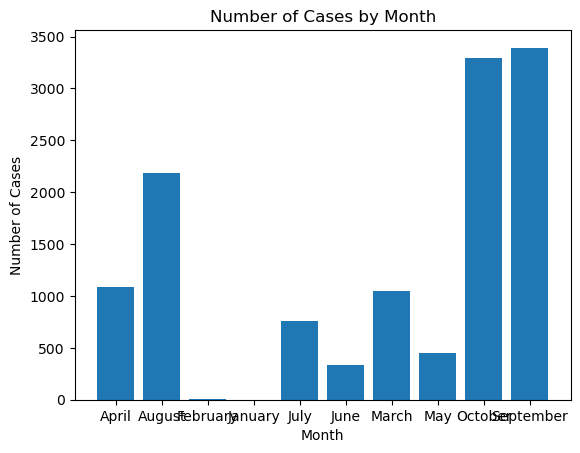

There was a spike from September to October


In [22]:
import numpy as np
import matplotlib.pyplot as plt

monthly_cases = df.groupby('Month')['Reported_Date'].count().to_dict()

months = list(monthly_cases.keys())
cases = list(monthly_cases.values())

plt.bar(months, cases)
plt.xlabel('Month')
plt.ylabel('Number of Cases')
plt.title('Number of Cases by Month')
plt.show()

print('There was a spike from September to October')

## 15. Is there any gender imbalance in this data? Visualize the time trend of the number of cases for each gender and discuss.


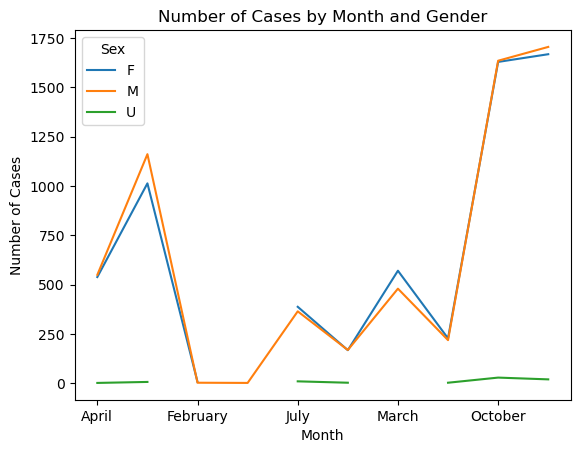

In [7]:
import numpy as np
import matplotlib.pyplot as plt

monthly_gender_cases = df.groupby(['Month', 'Sex'])['Reported_Date'].count().unstack()

monthly_gender_cases.plot(kind='line')
plt.xlabel('Month')
plt.ylabel('Number of Cases')
plt.title('Number of Cases by Month and Gender')
plt.show()



## 16. Create new dictionaries which contain the months as keys and the number of cases for corresponding months per each gender as values. Show the dictionaries. Find the month with the smallest number of female cases.

In [23]:
male_cases = {}
female_cases = {}

for month in df['Month'].unique():
    male_cases[month] = sum((df['Month'] == month) & (df['Sex'] == 'M'))
    female_cases[month] = sum((df['Month'] == month) & (df['Sex'] == 'F'))

# Show the dictionaries
print("Male cases by month:", male_cases)
print("Female cases by month:", female_cases)

# Find the month with the smallest number of female cases
smallest_month = min(female_cases, key=female_cases.get)
print(" \n Month with the smallest number of female cases:", smallest_month)

Male cases by month: {'January': 1, 'February': 2, 'March': 479, 'April': 549, 'May': 218, 'June': 168, 'July': 364, 'August': 1161, 'September': 1705, 'October': 1635}
Female cases by month: {'January': 0, 'February': 6, 'March': 570, 'April': 538, 'May': 227, 'June': 167, 'July': 387, 'August': 1013, 'September': 1668, 'October': 1629}
 
 Month with the smallest number of female cases: January


## 17. Is there any imbalance among different regions in this data? Make some plots to visualize the difference among the regions in terms of reported cases in every month, and discuss your results.

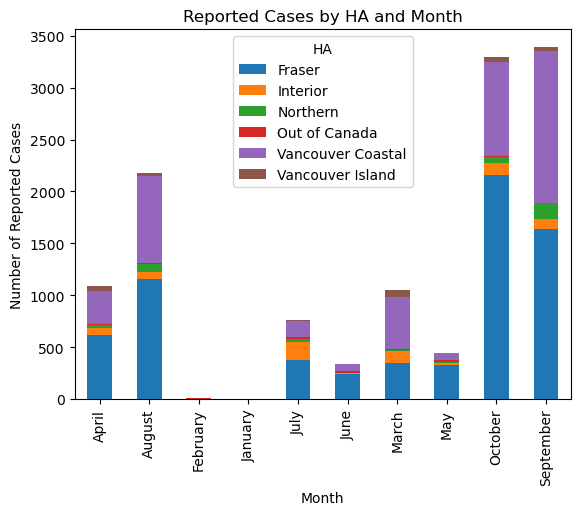

In [24]:
import matplotlib.pyplot as plt

monthly_region_cases = df.groupby(['Month', 'HA']).count()['Reported_Date']

monthly_region_cases = monthly_region_cases.unstack()

monthly_region_cases.plot(kind='bar', stacked=True)

plt.title('Reported Cases by HA and Month')
plt.xlabel('Month')
plt.ylabel('Number of Reported Cases')
plt.show()


## 18. Calculate the cumulative reported cases in every month for each region. Print the first 8 rows. Visualize the difference among the regions in terms of cumulative reported cases in every month, and discuss your results.


In [27]:
monthly_region_cases = df.groupby(['Month', 'HA']).count()['Reported_Date']
monthly_region_cases[:8]


Month   HA               
April   Fraser                617
        Interior               66
        Northern               33
        Out of Canada           5
        Vancouver Coastal     315
        Vancouver Island       52
August  Fraser               1154
        Interior               70
Name: Reported_Date, dtype: int64

In [28]:
print('\n most of them seem to be in Fraser, whether it was August or April')


 most of them seem to be in Fraser, whether it was August or 


## 19. Open question: what else can you find from this data?

In [30]:


region_age = df.groupby(['HA','Age_Group']).count()['Reported_Date']
region_age



HA                 Age_Group
Fraser             10-19         530
                   20-29        1576
                   30-39        1330
                   40-49        1080
                   50-59         926
                   60-69         527
                   70-79         323
                   80-89         205
                   90+            87
                   <10           280
Interior           10-19          43
                   20-29         181
                   30-39         115
                   40-49         105
                   50-59          76
                   60-69          69
                   70-79          36
                   80-89          15
                   90+             2
                   <10            20
Northern           10-19          32
                   20-29          61
                   30-39          65
                   40-49          56
                   50-59          56
                   60-69          40
         

In [31]:
print('The age groups for each type of hospital')

The age groups for each type of hospital
